**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [20]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
from IPython.display import display
from scipy.stats import norm

import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from exam_malthe import Problem3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [21]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [22]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [23]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [24]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [25]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [26]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [27]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [28]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [29]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [30]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [31]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

In [32]:
from types import SimpleNamespace
import numpy as np

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [33]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

The refined global optimizer with multi-start is implemented in the class `Problem3()` in the py-file. The functions are implemented as specified by the pseudo-algorithm above, and the solution is found and printed in `self.global_optimizer()`

Below we have printed the convergence towards the global minimum. We see that after 365 iterations, the algorithm finds the correct global minimum.

In [34]:
model = Problem3() # call instance of class
model.global_optimizer() # implement global optimizer and print solution

   0: Effective initial guess = ( 364.11,  33.03) -> converged at ( 364.24,  35.51) with f =  33.50021697
   1: Effective initial guess = (-457.07, 167.62) -> converged at (-458.44, 168.66) with f =  59.68725094
   2: Effective initial guess = (-490.89,-201.33) -> converged at (-489.84,-204.16) with f =  70.44777075
   3: Effective initial guess = ( -87.14,  65.26) -> converged at ( -84.78,  66.58) with f =   2.90705642
   4: Effective initial guess = ( 153.75, 236.87) -> converged at ( 153.86, 235.24) with f =  19.76920515
   5: Effective initial guess = ( 347.94,-441.73) -> converged at ( 348.53,-439.39) with f =  78.70208398
   6: Effective initial guess = (-188.68,-358.13) -> converged at (-188.40,-355.07) with f =  40.42906777
   7: Effective initial guess = ( 248.79,-559.92) -> converged at ( 251.19,-559.22) with f =  94.04833711
   8: Effective initial guess = ( 491.10,-113.81) -> converged at ( 489.84,-115.40) with f =  63.34899883
   9: Effective initial guess = ( 312.52, -31.

Below, we have illustrated how the effective initial guesses $x_1^{k0}$ and $x_2^{k0}$ vary with the iteration counter $k$. We see that both variables fluctuates around the true optimizing values, and as the iteration increases the deviations from the true optimizing values decreases. As we saw above the global minimum of the Griewank function is found after 365 iterations.

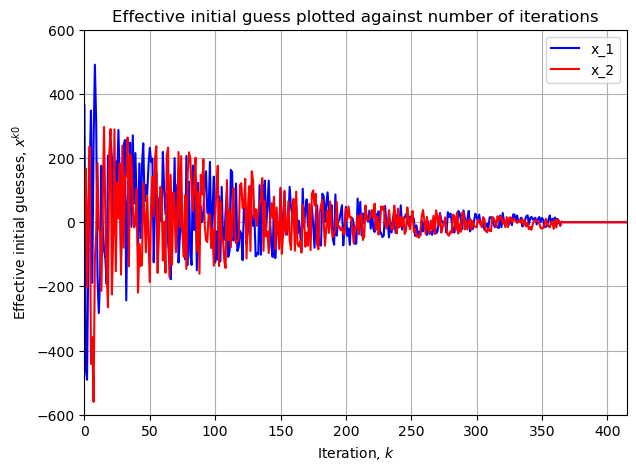

In [35]:
model.plot() # plot effective initial guesses against iterations

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We can test if the convergence is faster and illustrate what happens when we set $\underline{K} = 100$

   0: Effective initial guess = ( 364.11,  33.03) -> converged at ( 364.24,  35.51) with f =  33.50021697
   1: Effective initial guess = (-457.07, 167.62) -> converged at (-458.44, 168.66) with f =  59.68725094
   2: Effective initial guess = (-490.89,-201.33) -> converged at (-489.84,-204.16) with f =  70.44777075
   3: Effective initial guess = ( -87.14,  65.26) -> converged at ( -84.78,  66.58) with f =   2.90705642
   4: Effective initial guess = ( 153.75, 236.87) -> converged at ( 153.86, 235.24) with f =  19.76920515
   5: Effective initial guess = ( 347.94,-441.73) -> converged at ( 348.53,-439.39) with f =  78.70208398
   6: Effective initial guess = (-188.68,-358.13) -> converged at (-188.40,-355.07) with f =  40.42906777
   7: Effective initial guess = ( 248.79,-559.92) -> converged at ( 251.19,-559.22) with f =  94.04833711
   8: Effective initial guess = ( 491.10,-113.81) -> converged at ( 489.84,-115.40) with f =  63.34899883
   9: Effective initial guess = ( 312.52, -31.

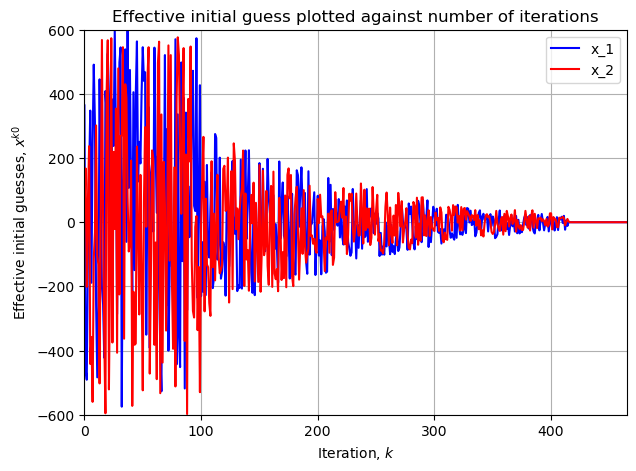

In [36]:
model = Problem3() # call instance of class
model.par.K_warm = 100 # change warm-ups to 100

# Solve and plot model
model.global_optimizer() # implement global optimizer and print solution
print("\n")
model.plot() # plot effective initial guesses against iterations


From the prints above, we see that the speed of convergence has now increased to 415 iterations by increasing $\underline{K}$ to 100. From the plot it is apparent that increasing $\underline{K}$, i.e. increasing the number of *warm-up iterations*, will obviously slow up the convergence towards the global minimum.

 The intuition is that in the 100 *warm-up iterations* where the guesses are just randomly drawn from a uniform distribution, the solver wrongly converges to many of the local minima. Moreover, the deviation from the global optimum does not converge towards 0 when we increase the number of iterations. 
 
 However, after the 100 *warm-up iterations*, we start defining our effective initial guesses $\mathbf{x}^{k0}$ as a weighted average of the random draw, $x^k$, and the previous initial guess that returns the so far lowest function value, $x^*$. By exploiting previous evalutions that returns low function values, we see a very clear picture from the graph above that just after the 100th iteration our effective initial guesses starts deviating less from the global optimum, and that they starts converging towards the global optimum when we increase the number of iteration.




Thus, if we instead decreased $\underline{K}$, we would lower the speed of convergence. However, lowering $\underline{K}$ to 1 would probably not be optimal regarding speed of convergence, because this would imply that $\mathbf{x}^{k0}$ would only be based on one previous random draw in the first iteration following the warm-up iteration. If this random draw is far away from the global optimum the next iterations would naturally also be more imprecise as there is a high dependency on this first draw. However, if we do a few warm-up iteration we lower the risk of extreme random draws slowing down the convergence of the algortihm.

Below, we have tried to find the optimal value of $\underline{K}$ regarding the speed of convergence. We have done this in `self.estimate()`, where we estimate the optimum value of $\underline{K}$ by looping through a list of integer values in the range from 1 to 40, and then the algorithm returns the $\underline{K}$ that minimizes the number of iterations.

In [37]:
K_warm_opt = model.estimate()

The number of warm-up iterations maximizing speed of convergence is 4.
This implies 95 iterations before convergence to global optimum is obtained.


So, if we set $\underline{K}=4$, we will maximize the speed of convergence towards the global optimum. We can plot this as:

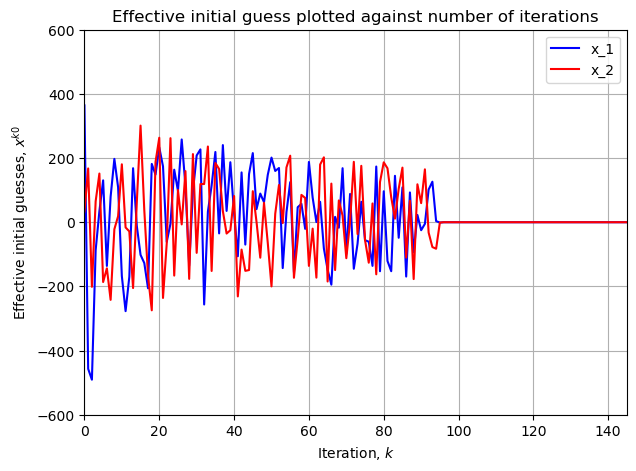

In [38]:
model.par.K_warm = K_warm_opt # change warm-ups to optimal number of warm-ups
model.global_optimizer(do_print=False,do_plot=True)
